# The atomic data

## Changing the data files used for atomic data

Since, for a given ion, there can be different calculations of atomic data with slightly (or not so slightly!) different results, more than one version of the data can exist for a given ion. The data are stored in and read from different types of files depending on the mechanism of line formation:

* In the case of recombination data, a single xxx_rec_XYZ.fits file contains the line emissivities, in a 2D temperature-density dependent table. 
* In the case of collisionally excited lines, the data are organized in different way depending on the file format:
    * The only data format admitted was, originally, fits (extension: .fits). Fits atomic data for a given ion are organized in two files (xxx here represents the ion [e.g., "o_iii" for O III] and XYZ is the acronym of the source paper(s)):
        * the xxx_atom_XYZ.fits file, containing the energies, the statistical weights and the transitions probabilities (the Einstein coefficients Aij)
        * the xxx_coll_XYZ.fits file, containing the temperature-dependent collision strengths.
    *  Since version 1.0.1, fits file have being totally replaced by plain ascii tables (extension .dat), which are organized as follows: 
        * xxx_levels.dat contain the energy levels and statistical weights. These file are downloaded from NIST and the source papers are encoded within the file and translated by PyNeb into an explicit bibliographic reference.
        * xxx_atom_XYZ.dat contain the transitions probabilities
        * xxx_coll_XYZ.fits contain the temperature-dependent collision strengths

    *  Chianti data are also usable if the user installed the Chianti database and set up the XUVTOP environment variable pointing to the corresponding directory. 

Each of these file contains information for a finite number of levels N. Specifically, the energy levels and the statistical weights are arrays with N elements (one value per level), while the transition probability tables are triangular N*N matrices with zeros on the main diagonal (transition probabilities are different from zero only for (j -> i) transitions with  j > i).

This number is a feature of the particular atomic calculation, not an intrinsic feature of the physical atom, so that an Atom object created within PyNeb will have a number of levels NLevels equal to the number of levels of all the data used (or the minimum of them if either of the atom, coll or levels is different). 

You can access the NIST raw data by:

In [1]:
# %matplotlib inline
import pyneb as pn
O3 = pn.Atom('O', 3)

In [2]:
O3.NIST

array([('2s2.2p2', '3P', 0.,     0.   , 'L7288'),
       ('2s2.2p2', '3P', 1.,   113.178, 'L7288'),
       ('2s2.2p2', '3P', 2.,   306.174, 'L7288'),
       ('2s2.2p2', '1D', 2., 20273.27 , 'L7288'),
       ('2s2.2p2', '1S', 0., 43185.74 , 'L7288'),
       ('2s.2p3', '5S*', 2., 60324.79 , 'L7288')],
      dtype=[('conf', '<U23'), ('term', '<U9'), ('J', '<f8'), ('energy', '<f8'), ('ref', '<U10')])

You can access the full raw NIST data set by:

In [3]:
pn.utils.manage_atomic_data.getLevelsNIST('O2') #O2 is lighter than O3...

array([('2s2.2p3', '4S*', 1.5,      0.   , 'L11267'),
       ('2s2.2p3', '2D*', 2.5,  26810.55 , 'L11267'),
       ('2s2.2p3', '2D*', 1.5,  26830.57 , 'L11267'),
       ('2s2.2p3', '2P*', 1.5,  40468.01 , 'L11267'),
       ('2s2.2p3', '2P*', 0.5,  40470.   , 'L11267'),
       ('2s.2p4', '4P', 2.5, 119837.21 , 'L11267'),
       ('2s.2p4', '4P', 1.5, 120000.43 , 'L11267'),
       ('2s.2p4', '4P', 0.5, 120082.86 , 'L11267'),
       ('2s.2p4', '2D', 2.5, 165988.46 , 'L11267'),
       ('2s.2p4', '2D', 1.5, 165996.5  , 'L11267'),
       ('2s2.2p2.(3P).3s', '4P', 0.5, 185235.281, 'L11267'),
       ('2s2.2p2.(3P).3s', '4P', 1.5, 185340.577, 'L11267'),
       ('2s2.2p2.(3P).3s', '4P', 2.5, 185499.124, 'L11267'),
       ('2s2.2p2.(3P).3s', '2P', 0.5, 188888.543, 'L11267'),
       ('2s2.2p2.(3P).3s', '2P', 1.5, 189068.514, 'L11267'),
       ('2s.2p4', '2S', 0.5, 195710.47 , 'L11267'),
       ('2s2.2p2.(3P).3p', '2S*', 0.5, 203942.288, 'L11267'),
       ('2s2.2p2.(3P).3p', '4D*', 0.5, 206730.762, 

You can print the name of the atomic data used for a given ion with:

In [4]:
print(O3.atomFile)

o_iii_atom_FFT04-SZ00.dat


In [5]:
print(O3.collFile)

o_iii_coll_SSB14.dat


As the files can be located in different directories (including some from the user), you may also find useful to print out the path:

In [6]:
print(O3.atomPath)
print(O3.collPath)

/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/atomic_data/
/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/atomic_data/


A set of data files for a given group of ions is called a data set. The default data set (or the adopted data set, if a different one has been set) can be displayed with the command:

In [7]:
pn.atomicData.getDataFile()

{'H1': {'rec': 'h_i_rec_SH95.hdf5'},
 'He1': {'rec': 'he_i_rec_Pal12-Pal13.hdf5'},
 'He2': {'rec': 'he_ii_rec_SH95.hdf5'},
 'Al2': {'atom': 'al_ii_atom_JSP86-HK87-VVF96-KS86.dat',
  'coll': 'al_ii_coll_KHAF92-TBK85-TBK84.dat'},
 'Ar2': {'atom': 'ar_ii_atom_Bal06.dat', 'coll': 'ar_ii_coll_PB95.dat'},
 'Ar3': {'atom': 'ar_iii_atom_MB09.dat', 'coll': 'ar_iii_coll_MB09.dat'},
 'Ar4': {'atom': 'ar_iv_atom_RGJ19.dat', 'coll': 'ar_iv_coll_RB97.dat'},
 'Ar5': {'atom': 'ar_v_atom_LL93-MZ82-KS86.dat',
  'coll': 'ar_v_coll_GMZ95.dat'},
 'Ba2': {'atom': 'ba_ii_atom_C04.dat', 'coll': 'ba_ii_coll_SB98.dat'},
 'Ba4': {'atom': 'ba_iv_atom_BHQZ95.dat', 'coll': 'ba_iv_coll_SB98.dat'},
 'C1': {'atom': 'c_i_atom_FFS85.dat',
  'coll': 'c_i_coll_JBK87-PA76.dat',
  'rec': 'c_i_rec_P91.func'},
 'C2': {'atom': 'c_ii_atom_GMZ98.dat',
  'coll': 'c_ii_coll_BP92.dat',
  'rec': 'c_ii_rec_D00.func'},
 'C3': {'atom': 'c_iii_atom_G83-NS78-WFD96.dat',
  'coll': 'c_iii_coll_Bal85.dat',
  'rec': 'c_iii_rec_P91.func'},
 '

while the data files set for a particular ion can be displayed by providing an argument to the above; e.g. for [SIV]:

In [8]:
pn.atomicData.getDataFile('S4')

warng _ManageAtomicData: rec data not available for S4
warng _ManageAtomicData: trc data not available for S4


('s_iv_atom_JKD86-DHKD82.dat', 's_iv_coll_DHKD82.dat', None, None)

The complete inventory of data available for a given ion can be displayed with the command:

In [9]:
pn.atomicData.getAllAvailableFiles('O2')

['* o_ii_atom_Z82-WFD96.dat',
 '* o_ii_coll_Kal09.dat',
 '* o_ii_rec_SSB17-B-opt.hdf5',
 'o_ii_atom.chianti',
 'o_ii_atom_CQL07-FFT04.dat',
 'o_ii_atom_FFT04-WFD96.dat',
 'o_ii_atom_FFT04.dat',
 'o_ii_atom_GFF84.dat',
 'o_ii_atom_HGZJYL14-FFT04.dat',
 'o_ii_atom_HLZSZ18-FFT04.dat',
 'o_ii_atom_WFD96.dat',
 'o_ii_atom_Z87.dat',
 'o_ii_coll.chianti',
 'o_ii_coll_KSFK09.dat',
 'o_ii_coll_P06-T07.dat',
 'o_ii_coll_P76-McLB93-v1.dat',
 'o_ii_coll_P76-McLB93-v2.dat',
 'o_ii_coll_T07.dat',
 'o_ii_rec_P91.func',
 'o_ii_rec_S94.func',
 'o_ii_rec_SSB17-A-IR.hdf5',
 'o_ii_rec_SSB17-A-opt.hdf5',
 'o_ii_rec_SSB17-B-IR.hdf5',
 'o_ii_rec_SSB17-C-IR.hdf5',
 'o_ii_rec_SSB17-C-opt.hdf5']

This method looks for all the “o\_ii\_*” files in a set of paths which includes the location of the atomic data provided with the package and the current directory (the one from where the python session is running); additional paths can be added with the following command:

In [10]:
pn.atomicData.addDataFilePath("/tmp")

If you want to change several data files at once, it may be worth defining a dictionary with all your preferred atomic data files within your script:

In [11]:
DataFileDict = {'N1': {'atom': 'n_i_atom_KS86-WFD96.dat', 'coll': 'n_i_coll_PA76-DMR76.dat'},
                'N2': {'atom': 'n_ii_atom_GMZ97-WFD96.dat', 'coll': 'n_ii_coll_LB94.dat'},
                'O2': {'atom': 'o_ii_atom_Z82-WFD96.dat', 'coll': 'o_ii_coll_P06-T07.dat'},
                'O3': {'atom': 'o_iii_atom_FFT04-SZ00.dat', 'coll': 'o_iii_coll_AK99.dat'},
                'Ne3': {'atom': 'ne_iii_atom_GMZ97.dat', 'coll': 'ne_iii_coll_McLB00.dat'}}
pn.atomicData.setDataFileDict(DataFileDict)

Make sure that all the files listed actually exist, as this is not checked by the code at this level.

## Predefined sets of atomic data

Predefined atomic data sets are provided by PyNeb. Each data set is identified by a label; the one of the default data set can be retrieved by the following command:

In [12]:
pn.atomicData.defaultDict

'PYNEB_23_01'

To display the complete list of the existing predefined dictionaries, enter: 

In [13]:
pn.atomicData.getAllPredefinedDict()

dict_keys(['IRAF_09_orig', 'IRAF_09', 'PYNEB_13_01', 'PYNEB_14_01', 'PYNEB_14_02', 'PYNEB_14_03', 'PYNEB_16_01', 'PYNEB_17_01', 'PYNEB_17_02', 'PYNEB_18_01', 'PYNEB_20_01', 'PYNEB_21_01', 'PYNEB_23_01'])

The following command can be used to set one of them:

In [14]:
pn.atomicData.includeFitsPath()
pn.atomicData.setDataFileDict("IRAF_09")

To revert to the default set:

In [15]:
pn.atomicData.resetDataFileDict()
pn.atomicData.removeFitsPath()

You can have a look at the other methods of pn.atomicData in the Reference Manual, or using the __help__ command.

## Using CHIANTI database

You may have downloaded the CHIANTI database from the website  http://www.chiantidatabase.org/chianti_download.html. In this case you can use its data to feed PyNeb. You need first to define the environment variable XUVTOP to point to the directory where the database is on your disk.

Then you can ask PyNeb to use the atomic data from CHIANTI for a given ion:

In [16]:
pn.atomicData.setDataFile('o_iii_atom.chianti')
pn.atomicData.setDataFile('o_iii_coll.chianti')
O3_ch = pn.Atom('O',3)
print(O3_ch)

/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/utils/pn_chianti.py:333: RuntimeWarning: divide by zero encountered in scalar divide
  wave = 1. / abs(self._Energy[i] - self._Energy[j])


Atom O3 from o_3.wgfa and o_3.scups


/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/pynebcore.py:1624: RuntimeWarning: invalid value encountered in scalar divide
  self._B[i,j] = self._A[i,j] / (8 * np.pi * CST.HPLANCK * (self.getEnergy(i+1, unit='cm-1')-self.getEnergy(j+1, unit='cm-1'))**3)


If you need to include all the available CHIANTI data, you can use the following command:

In [17]:
atoms = pn.atomicData.getAllAtoms()
print(atoms)
print('After including CHIANTI:')
pn.atomicData.addAllChianti()
atoms = pn.atomicData.getAllAtoms()
print(atoms)

['Al2', 'Ar2', 'Ar3', 'Ar4', 'Ar5', 'Ba2', 'Ba4', 'C1', 'C2', 'C3', 'C4', 'Ca5', 'Cl2', 'Cl3', 'Cl4', 'Fe3', 'K4', 'K5', 'Mg5', 'Mg7', 'N1', 'N2', 'N3', 'N4', 'Na4', 'Na6', 'Ne2', 'Ne3', 'Ne4', 'Ne5', 'Ne6', 'Ni3', 'O1', 'O2', 'O3', 'O4', 'O5', 'S2', 'S3', 'S4', 'Si2', 'Si3', 'Xe3', 'Xe4', 'Xe6', 'Kr3', 'Kr4', 'Kr5', 'Se3', 'Se4', 'Br3', 'Br4', 'Rb4', 'Rb5', 'Rb6', 'Fe4', 'Fe5', 'Fe6', 'Fe7', '3He2', 'Fe2', 'P2', 'Te3', 'Kr6', 'Br5']
After including CHIANTI:
['Al2', 'Ar2', 'Ar3', 'Ar4', 'Ar5', 'Ba2', 'Ba4', 'C1', 'C2', 'C3', 'C4', 'Ca5', 'Cl2', 'Cl3', 'Cl4', 'Fe3', 'K4', 'K5', 'Mg5', 'Mg7', 'N1', 'N2', 'N3', 'N4', 'Na4', 'Na6', 'Ne2', 'Ne3', 'Ne4', 'Ne5', 'Ne6', 'Ni3', 'O1', 'O2', 'O3', 'O4', 'O5', 'S2', 'S3', 'S4', 'Si2', 'Si3', 'Xe3', 'Xe4', 'Xe6', 'Kr3', 'Kr4', 'Kr5', 'Se3', 'Se4', 'Br3', 'Br4', 'Rb4', 'Rb5', 'Rb6', 'Fe4', 'Fe5', 'Fe6', 'Fe7', '3He2', 'Fe2', 'P2', 'N5', 'O6', 'Te3', 'Kr6', 'Br5', 'C6', 'N7', 'O8', 'Ne10', 'Na11', 'Mg12', 'Al13', 'Si14', 'P15', 'S16', 'Cl17', 'Ar18',

## Creating new atomic data files

The following is an example of a 6-level atom file of [O III], containing the matrix of transition probabilities. The energy levels and statistical weigths are not in this file. This file is o_iii_atom_FFT04.dat.

    Aij
    1/s 1/s 1/s 1/s 1/s 1/s  
    0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00  
    2.5960000e-05 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00  
    3.0300000e-11 9.6320000e-05 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00  
    2.3220000e-06 6.9510000e-03 2.0290000e-02 0.0000000e+00 0.0000000e+00 0.0000000e+00  
    0.0000000e+00 2.2550000e-01 6.9980000e-04 1.6850000e+00 0.0000000e+00 0.0000000e+00  
    2.1910000e-03 2.3080000e+02 5.7650000e+02 5.7770000e-03 3.7600000e-11 0.0000000e+00  
    *** ATOM oxygen  
    *** SPECTRUM 3  
    *** GSCONFIG unknown  
    *** SOURCE3 Froese Fischer et al 2004, ADNDT 87, 1  
    *** NOTE3 A-values from all levels  

The effective collision strengths are a function of electron temperature (a collective property of the electron distribution) and are obtained as the average over a Maxwellian distribution of the collision strengths, which depend on the energy. (Note: in this document, we will often refer to the effective collision strengths as collision strengths for short, although this is not strictly correct.) They are usually published for a handful of T values and must be interpolated to get the collision strength at the desired values. As a result, there is a whole 1-D array of collision strengths, with one element for each tabulated temperature value, for each transition j -> i  with j > i. The existence of this 3rd dimension prevents the data from being simply stored in a matrix as transition probabilities are. Instead, each transition is presented in a line, as in the following example:

    *** OIII collision strengths data  
    0 0 3.699e+00 4.000e+00 4.301e+00 4.477e+00  
    1 2 5.240e-01 5.648e-01 6.007e-01 6.116e-01  
    1 3 2.469e-01 2.766e-01 3.106e-01 3.264e-01  
    1 4 2.347e-01 2.693e-01 3.094e-01 3.256e-01  
    1 5 4.094e-02 4.069e-02 4.299e-02 4.424e-02  
    1 6 1.130e-01 1.239e-01 1.346e-01 1.373e-01  
    2 3 1.210e+00 1.330e+00 1.451e+00 1.499e+00  
    2 4 7.067e-01 8.108e-01 9.313e-01 9.802e-01  
    2 5 1.228e-01 1.223e-01 1.294e-01 1.332e-01  
    2 6 3.390e-01 3.717e-01 4.038e-01 4.119e-01  
    3 4 1.188e+00 1.363e+00 1.564e+00 1.645e+00  
    3 5 2.045e-01 2.046e-01 2.170e-01 2.235e-01  
    3 6 5.650e-01 6.195e-01 6.730e-01 6.865e-01  
    4 5 4.544e-01 5.661e-01 6.230e-01 6.219e-01  
    4 6 0.000e+00 0.000e+00 0.000e+00 0.000e+00  
    5 6 0.000e+00 0.000e+00 0.000e+00 0.000e+00  
    *** T_UNIT log(K)   
    *** ATOM oxygen  
    *** SPECTRUM 3  
    *** GSCONFIG p2  
    *** SOURCE1 Palay, E. et al. 2012, MNRAS Letters, 423, L35  
    *** NOTE1 All collision strengths from levels up to 5  
    *** SOURCE2 Aggarwal and Keenan 1999, ApJS 123, 311  
    *** NOTE2 Collision strengths of 6-1, 6-2, 6-3  

The first row of the data block (0 0 …) contains, from the third element on, the array of electron temperatures for which the collision strengths are tabulated (in log10(K) or K/10000, depending on the particular data set).

The __original fits data__ for collision strengths support, by default, a Chebyshev polynomial interpolation: each transition is described by a Chebyshev polynomial of order n that interpolates the tabulated values. The default value for the Chebyshev order is the number of temperature values, but other order can be specified when calling pn.writeColl.
If, for some reason, a Chebyshev interpolation is not desired, the data can also be interpolated linearly, when the instantiation of the corresponding Atom is done.

The __ascii data__ (those currently used by default) only support linear interpolation among tabulated values. 

Notice the use of __SOURCE__ and __NOTE__ keywords to store the data references. It is very important to fill in these keywords and to give a descriptive name to the file, i.e. a name that reflects the sources of the data. When an __Atom__ object is built, this information is stored and is retrievable thereafter through: 

In [18]:
O3.printSources()

O3: A values for 4-2 and 4-3: Storey and Zeippen 2000, 312, 813: 
O3: A-values from all levels: Froese Fischer et al 2004, ADNDT 87, 1: 
O3: Energy levels: 
    Ref. 7288 of NIST 2014 (try this: http://physics.nist.gov/cgi-bin/ASBib1/get_ASBib_ref.cgi?db=el&db_id=7288&comment_code=&element=O&spectr_charge=3&): 
O3: Collision strengths: Storey, P. J., Sochi, T., & Badnell, N. R. 2014, MNRAS, 441, 3028: 


## Plotting atomic data

The atomic data available can be plotted using the methods of the __DataPlot__ class. The class must be instantiated by specifying which data sets are to be plotted. The available methods are __plotA__, __plotRelA__ and __plotAllA__ to plot transition probabilities, and __plotOmega__ to plot collision strengths.

You must first create an instantiation of DataPlot for a given atom, e.g.:

In [19]:
dp_O3 = pn.DataPlot('O', 3, NLevels=5) 
dp_S3 = pn.DataPlot('S', 3)

warng _ManageAtomicData: trc data not available for O3
warng _ManageAtomicData: rec data not available for S3
warng _ManageAtomicData: trc data not available for S3


Then you can plot the different As and Omegas :

warng DataPlot.plotA: Problem in plotting A


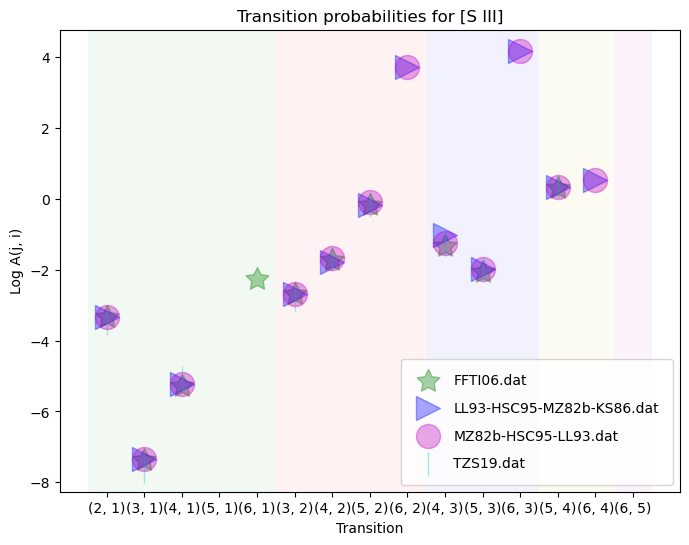

In [20]:
dp_S3.plotA(figsize=(8, 6)) # transition probabilities plot

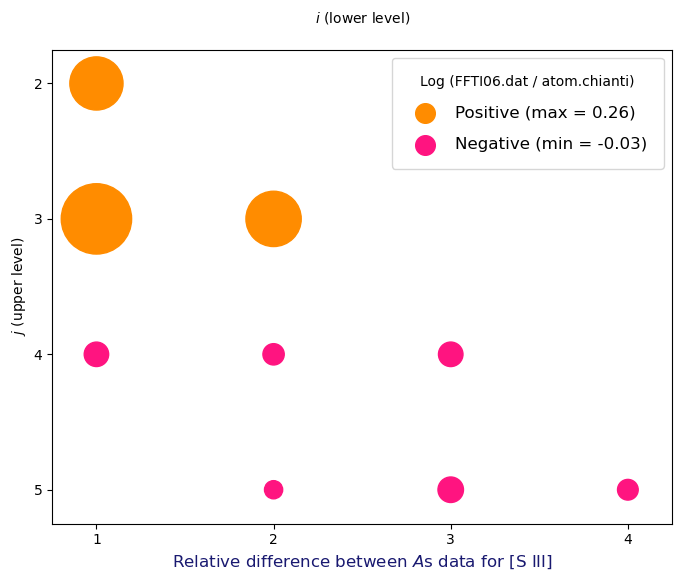

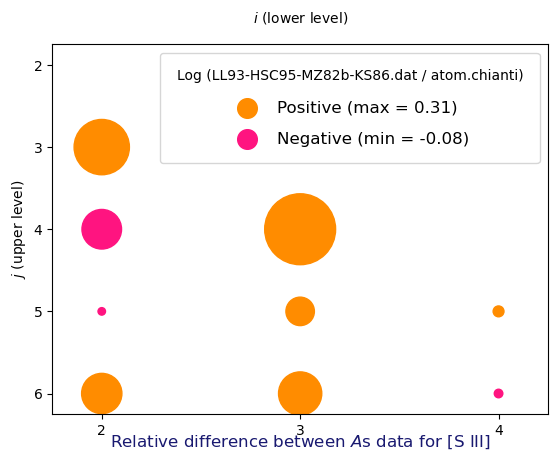

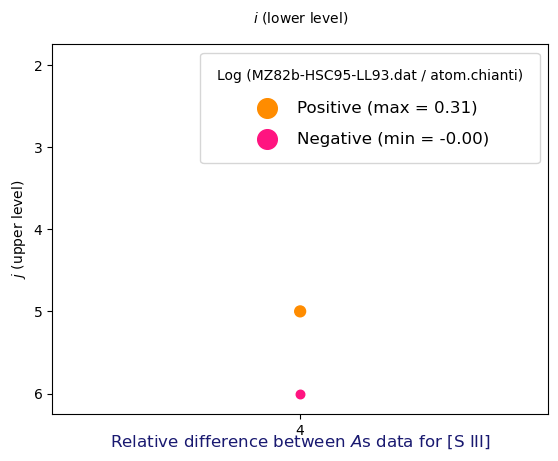

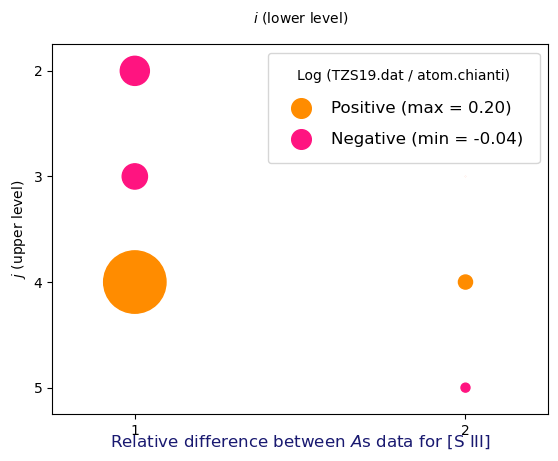

In [21]:
dp_S3.plotRelA(figsize=(8, 6)) # relative transition probabilities plot

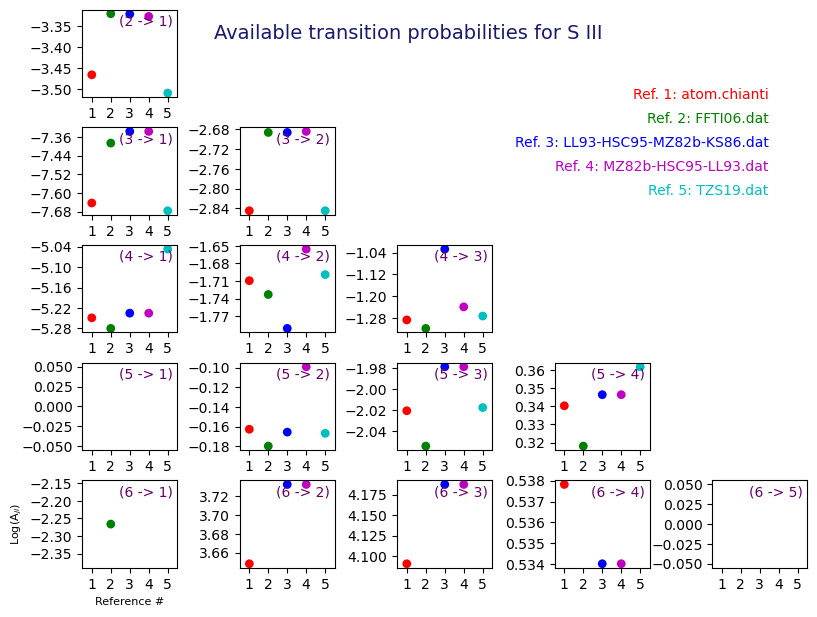

In [22]:
dp_S3.plotAllA(figsize=(8, 6)) 

/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/plot/plotAtomicData.py:477: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


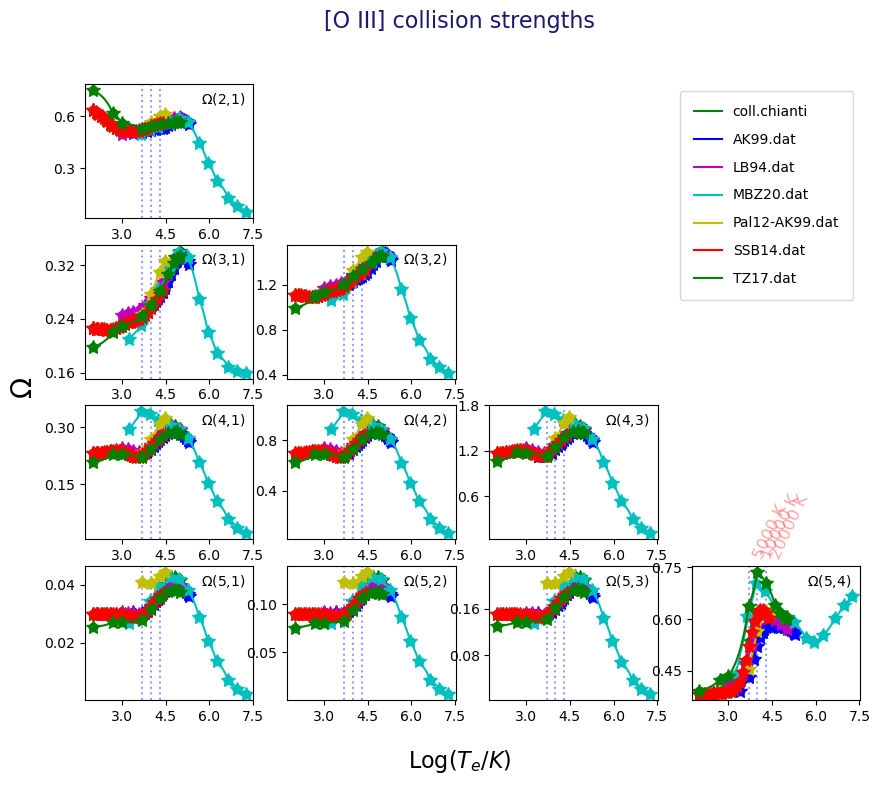

In [23]:
dp_O3.plotOmega(figsize=(10, 8)) # collision strength plot